# Benchmark T cell estimate scores

Script related to figure 3a

### Aim:
- Benchmark T cell estimate scores using immunofluorscent stainings from FFPE samples as a benchmark data set

In [16]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from statsmodels.stats.multitest import multipletests

In [20]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Load T cell fractions

In [21]:
ls ../../Data/2/T_cell_counts_fractions.txt

../../Data/2/T_cell_counts_fractions.txt


In [22]:
file_Tcells = home + 'Data/2/T_cell_counts_fractions.txt'

Tcell_counts = pd.read_csv(file_Tcells,
                           sep='\t',
                           index_col='Well')

In [23]:
Tcell_counts.head()

,Case,Label,Site,Habitat,IF_index_file,CD8,FoxP3,CD4FoxP3,CD4,Cell_counts,CD8_fraction,CD4_fraction,CD4FoxP3_fraction
Well,,,,,,,,,,,,,
A01,10,omentum green,omentum,green,23.0,5216.0,430.0,81.0,2340.0,41027.0,0.127136,0.055061,0.001974
A01,10,omentum green,omentum,green,24.0,4956.0,404.0,47.0,761.0,33929.0,0.146070,0.021044,0.001385
A01,10,omentum green,omentum,green,25.0,2485.0,197.0,58.0,1824.0,20667.0,0.120240,0.085450,0.002806
A01,10,omentum green,omentum,green,26.0,1826.0,195.0,52.0,680.0,11491.0,0.158907,0.054651,0.004525
A01,10,omentum green,omentum,green,27.0,1961.0,183.0,49.0,892.0,19348.0,0.101354,0.043570,0.002533


## Load methods' T cell estimates

### Bindea

In [24]:
ls ../../Data/3/BindeaImmuneCells_TreatmentNaive_NES.txt

../../Data/3/BindeaImmuneCells_TreatmentNaive_NES.txt


In [25]:
bin_estimates = pd.read_csv('../../Data/3/BindeaImmuneCells_TreatmentNaive_NES.txt',
                            sep='\t',
                            index_col='Term').T

In [26]:
bin_estimates.head()

Term,activated_Dendritic_cells,B_cells,CD8_T_cells,Citotoxic_cells,Dendritic_cells,Eosinophils,immature_Dendritic_cells,Macrophages,Mast_cells,Neutrophils,...,T_central_memory_cells,T_effector_memory_cells,T_follicular_helper_cells,T_gamma_delta_cells,Th1_cells,Th17_cells,Th2_cells,Treg_cells,Angiogenesis,Antigen_presentation_machinery
A01,-0.066755,-0.003080,0.095101,0.103809,-0.176476,-0.034222,0.033066,0.173286,-0.169287,-0.115161,...,0.220941,0.170772,0.020390,-0.196153,0.010330,-0.274938,0.105946,-0.281775,0.045868,0.320893
A02,0.097384,0.018624,0.099431,0.112686,-0.136052,0.007539,0.070141,0.208467,-0.181064,-0.114372,...,0.268895,0.144795,0.002610,-0.282197,0.018971,-0.205360,0.057963,-0.285308,0.025539,0.434731
A03,-0.072684,0.022716,0.094088,0.084148,-0.175692,-0.007610,0.098385,0.226473,-0.137479,-0.071694,...,0.230666,0.155337,0.022060,-0.322293,0.017047,-0.199423,0.098247,-0.377414,0.076452,0.312686
A04,0.084060,0.029516,0.074292,0.029771,-0.145138,0.022504,0.070774,0.157651,-0.183030,-0.150046,...,0.308700,0.153818,0.025942,-0.298855,0.051499,-0.064348,0.051628,-0.471797,-0.048372,0.407055
A05,-0.039156,-0.010552,0.093517,0.037928,-0.110276,-0.002670,0.044335,0.188873,-0.174625,-0.171121,...,0.262037,0.154022,0.019352,-0.303325,0.029933,-0.189297,0.075237,-0.197050,-0.007485,0.363683


In [27]:
bin_estimates.columns.values

array(['activated_Dendritic_cells', 'B_cells', 'CD8_T_cells',
       'Citotoxic_cells', 'Dendritic_cells', 'Eosinophils',
       'immature_Dendritic_cells', 'Macrophages', 'Mast_cells',
       'Neutrophils', 'NK_CD56bright_cells', 'NK_CD56dim_cells',
       'NK_cells', 'plasmacytoid_Dendritic_cells', 'T_cells',
       'T_helper_cells', 'T_central_memory_cells',
       'T_effector_memory_cells', 'T_follicular_helper_cells',
       'T_gamma_delta_cells', 'Th1_cells', 'Th17_cells', 'Th2_cells',
       'Treg_cells', 'Angiogenesis', 'Antigen_presentation_machinery'],
      dtype=object)

### Davoli

In [28]:
ls ../../Data/3/DavoliImmuneCells_TreatmentNaive_NES.txt

../../Data/3/DavoliImmuneCells_TreatmentNaive_NES.txt


In [29]:
dav_estimates = pd.read_csv('../../Data/3/DavoliImmuneCells_TreatmentNaive_NES.txt',
                            sep='\t',
                            index_col='Term').T

In [30]:
dav_estimates.head()

Term,CD4_mature,CD8_effector,NK_cells,B_cells,T_regs,Dendritics,CD8_effector_NK_cells,Macrophages,Macrophages_M2,Macrophages_M1
A01,0.031713,0.057870,0.071188,0.269105,-0.408595,0.277611,-0.094438,0.050810,-0.097125,0.135013
A02,0.085348,0.327791,0.033066,0.247262,-0.250671,0.328886,-0.007935,0.307424,0.059936,0.352826
A03,0.059252,0.166517,0.024730,0.380669,-0.431835,0.395925,-0.073720,0.195761,0.037653,0.250368
A04,-0.184143,-0.183259,-0.144077,0.218910,-0.321068,0.324538,-0.263503,0.212472,0.046741,0.181477
A05,-0.083855,-0.118332,-0.093498,0.282003,-0.276252,0.282974,-0.253704,0.174884,-0.001540,0.174226


### Danaher

In [31]:
ls ../../Data/3/DanaherImmuneCells_TreatmentNaive_NES.txt

../../Data/3/DanaherImmuneCells_TreatmentNaive_NES.txt


In [32]:
dan_estimates = pd.read_csv('../../Data/3/DanaherImmuneCells_TreatmentNaive_NES.txt',
                            sep='\t',
                            index_col='Term').T

In [33]:
dan_estimates.head()

Term,B.cells,CD45,CD8.T.cells,Cytotoxic.cells,DC,Exhausted.CD8,Macrophages,Mast.cells,Neutrophils,NK.CD56dim.cells,NK.cells,T.cells,Th1.cells,Treg
A01,-0.218103,0.495984,-0.442538,0.059474,-0.100557,-0.116216,0.136324,-0.310781,-0.094225,-0.335844,-0.144626,0.028620,-0.441481,-0.246328
A02,-0.253355,0.490699,-0.336356,0.051655,-0.053349,-0.107627,0.268013,-0.288674,-0.138786,-0.412935,-0.183767,0.169190,-0.451091,-0.249417
A03,-0.253297,0.490699,-0.458109,0.037714,-0.114702,-0.100590,0.293607,-0.206061,-0.047718,-0.262218,-0.190375,0.096373,-0.481089,-0.329935
A04,-0.275943,0.373867,-0.428232,-0.097354,-0.106831,-0.160159,0.147951,-0.302122,-0.217232,-0.339700,-0.129709,-0.144655,-0.494680,-0.412445
A05,-0.278793,0.453563,-0.372922,-0.027970,0.006505,-0.113307,0.176414,-0.298843,-0.177172,-0.231478,-0.143417,-0.083256,-0.490012,-0.172261


### MCP counter

In [34]:
ls ../../Data/3/MCPcounterImmuneCells_TreatmentNaive_Results.txt

../../Data/3/MCPcounterImmuneCells_TreatmentNaive_Results.txt


In [35]:
mcp_estimates = pd.read_csv('../../Data/3/MCPcounterImmuneCells_TreatmentNaive_Results.txt',
                            sep='\t',
                            index_col='Term').T

In [36]:
mcp_estimates.head()

Term,T cells,CD8 T cells,Cytotoxic lymphocytes,NK cells,B lineage,Monocytic lineage,Myeloid dendritic cells,Neutrophils,Endothelial cells,Fibroblasts
A01,4.528487,3.362125,4.839624,4.044117,6.192896,5.626397,4.664111,5.290259,5.056271,9.317519
A02,5.207708,3.340149,4.830298,4.034815,6.174202,6.374711,4.723943,5.321202,4.931474,9.392827
A03,4.683623,3.170813,4.607910,4.192092,6.383181,6.394080,4.835921,5.413047,5.308636,9.563665
A04,4.609657,3.210788,4.295373,4.004696,5.801224,5.295973,4.551980,5.036501,4.760726,8.808253
A05,4.414914,3.267672,4.642049,4.145191,5.881343,5.899579,4.395316,4.950237,4.899817,8.272105


### CIBERSORT absolute

In [37]:
ls ../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt

../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt


In [38]:
cib_abs_results = pd.read_csv('../../Data/3/CIBERSORT_absolute_TreatmentNaive_Results.txt',
                              sep='\t',
                              index_col='Mixture')

In [39]:
cib_abs_results.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Absolute score (sig.score)
Mixture,,,,,,,,,,,,,,,,,,,,,
A01,0.021557,0.000000,0.315502,0.0,0.000000,0.088324,0.033568,0.0,0.00000,0.027776,...,0.014450,0.000000,0.041463,0.0,0.019144,0.018094,0.0,0.742259,0.689899,0.663951
A02,0.000083,0.000000,0.241360,0.0,0.000000,0.116493,0.007963,0.0,0.00000,0.102854,...,0.002606,0.027973,0.038371,0.0,0.023381,0.007771,0.0,0.594326,0.807266,0.637033
A03,0.000000,0.000000,0.286786,0.0,0.000000,0.188860,0.028038,0.0,0.00000,0.040406,...,0.006859,0.000000,0.027099,0.0,0.004736,0.015791,0.0,0.685774,0.740759,0.650632
A04,0.000000,0.027127,0.292471,0.0,0.032608,0.052369,0.000000,0.0,0.00518,0.000000,...,0.000000,0.052431,0.019916,0.0,0.003215,0.005984,0.0,0.673854,0.742165,0.580156
A05,0.000000,0.017532,0.298348,0.0,0.013684,0.104442,0.032678,0.0,0.00000,0.000000,...,0.000000,0.003416,0.025481,0.0,0.014741,0.000000,0.0,0.761541,0.668641,0.592368


### CIBERSORT relative

In [40]:
ls ../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt

../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt


In [41]:
cib_rel_results = pd.read_csv('../../Data/3/CIBERSORT_relative_TreatmentNaive_Results.txt',
                              sep='\t',
                              index_col='Mixture')

In [42]:
cib_rel_results.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,,,,,,,,,,
A01,0.032468,0.000000,0.475189,0.0,0.000000,0.133028,0.050558,0.0,0.000000,0.041834,...,0.004301,0.021764,0.000000,0.062449,0.0,0.028833,0.027253,0.0,0.742259,0.689899
A02,0.000130,0.000000,0.378881,0.0,0.000000,0.182869,0.012499,0.0,0.000000,0.161458,...,0.007450,0.004091,0.043911,0.060234,0.0,0.036704,0.012199,0.0,0.594326,0.807266
A03,0.000000,0.000000,0.440781,0.0,0.000000,0.290271,0.043093,0.0,0.000000,0.062102,...,0.008338,0.010542,0.000000,0.041650,0.0,0.007278,0.024270,0.0,0.685774,0.740759
A04,0.000000,0.046759,0.504124,0.0,0.056206,0.090266,0.000000,0.0,0.008929,0.000000,...,0.064709,0.000000,0.090374,0.034329,0.0,0.005541,0.010315,0.0,0.673854,0.742165
A05,0.000000,0.029596,0.503654,0.0,0.023101,0.176313,0.055165,0.0,0.000000,0.000000,...,0.024411,0.000000,0.005766,0.043016,0.0,0.024886,0.000000,0.0,0.761541,0.668641


### xCELL

In [43]:
ls ../../Data/3/xCell_TreatmentNaive_Results.txt

../../Data/3/xCell_TreatmentNaive_Results.txt


In [44]:
xcell_estimates = pd.read_csv('../../Data/3/xCell_TreatmentNaive_Results.txt',
                              sep='\t',
                              index_col=0).T

In [45]:
xcell_estimates.head()

,Adipocytes,Astrocytes,B-cells,Basophils,CD4+ T-cells,CD4+ Tcm,CD4+ Tem,CD4+ memory T-cells,CD4+ naive T-cells,CD8+ T-cells,...,cDC,iDC,ly Endothelial cells,mv Endothelial cells,naive B-cells,pDC,pro B-cells,ImmuneScore,StromaScore,MicroenvironmentScore
A01,0.1906,0.0000,0.0000,0.0681,0.0926,0.0000,0.1002,0.1544,0.0267,0.0548,...,0.0689,0.0000,0.0702,0.0000,0.0000,0.0168,0.0128,0.4338,0.2100,0.6438
A02,0.2367,0.0000,0.0580,0.0000,0.2097,0.0584,0.1394,0.3051,0.0000,0.0687,...,0.0237,0.0006,0.0000,0.0000,0.0146,0.0650,0.0120,0.4595,0.1854,0.6449
A03,0.2781,0.0000,0.0555,0.0000,0.1427,0.0280,0.1078,0.1985,0.0000,0.0762,...,0.1065,0.0641,0.0790,0.0659,0.0000,0.0067,0.0597,0.5284,0.2632,0.7916
A04,0.0308,0.0068,0.0199,0.0500,0.1017,0.1867,0.0000,0.0400,0.0116,0.0000,...,0.0000,0.0000,0.0205,0.0329,0.0000,0.0000,0.0355,0.3285,0.0271,0.3556
A05,0.0350,0.0000,0.0336,0.0000,0.0987,0.0125,0.0430,0.1371,0.0000,0.0000,...,0.0146,0.0000,0.0328,0.0000,0.0000,0.0102,0.0348,0.3736,0.1007,0.4743


In [46]:
xcell_estimates.columns.values

array(['Adipocytes', 'Astrocytes', 'B-cells', 'Basophils', 'CD4+ T-cells',
       'CD4+ Tcm', 'CD4+ Tem', 'CD4+ memory T-cells',
       'CD4+ naive T-cells', 'CD8+ T-cells', 'CD8+ Tcm', 'CD8+ Tem',
       'CD8+ naive T-cells', 'CLP', 'CMP', 'Chondrocytes',
       'Class-switched memory B-cells', 'DC', 'Endothelial cells',
       'Eosinophils', 'Epithelial cells', 'Erythrocytes', 'Fibroblasts',
       'GMP', 'HSC', 'Hepatocytes', 'Keratinocytes', 'MEP', 'MPP', 'MSC',
       'Macrophages', 'Macrophages M1', 'Macrophages M2', 'Mast cells',
       'Megakaryocytes', 'Melanocytes', 'Memory B-cells',
       'Mesangial cells', 'Monocytes', 'Myocytes', 'NK cells', 'NKT',
       'Neurons', 'Neutrophils', 'Osteoblast', 'Pericytes',
       'Plasma cells', 'Platelets', 'Preadipocytes', 'Sebocytes',
       'Skeletal muscle', 'Smooth muscle', 'Tgd cells', 'Th1 cells',
       'Th2 cells', 'Tregs', 'aDC', 'cDC', 'iDC', 'ly Endothelial cells',
       'mv Endothelial cells', 'naive B-cells', 'pDC', 'pro 

### TIMER

In [47]:
ls ../../Data/3/TIMERImmuneCells_TxNaive_Results.csv

../../Data/3/TIMERImmuneCells_TxNaive_Results.csv


In [48]:
tim_estimates = pd.read_csv('../../Data/3/TIMERImmuneCells_TxNaive_Results.csv',
                            sep=',',
                            index_col='sampleID')

In [49]:
tim_estimates.head()

,B_cell,T_cell.CD4,T_cell.CD8,Neutrophil,Macrophage,DC
sampleID,,,,,,
A01,0.092725,0.111783,0.232517,0.127759,0.070051,0.465537
A02,0.088487,0.119459,0.232331,0.126762,0.077563,0.466121
A03,0.094161,0.116386,0.230089,0.129606,0.080902,0.459321
A04,0.082317,0.124712,0.211901,0.123896,0.069127,0.467283
A05,0.091664,0.113799,0.220568,0.124662,0.077013,0.461357


### ConsensusTME

In [50]:
ls ../../Data/3/ConsensusTME_TreatmentNaive_NES.txt

../../Data/3/ConsensusTME_TreatmentNaive_NES.txt


In [51]:
con_estimates = pd.read_csv('../../Data/3/ConsensusTME_TreatmentNaive_NES.txt',
                            sep='\t',
                            index_col='Term').T

In [52]:
con_estimates.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells
A01,0.038479,0.210148,0.189096,0.157806,0.200823,0.132615,0.254307,0.105808,0.195547,0.013775,0.117728,-0.015117,0.127413,0.535331,-0.042384,-0.017664,-0.038414,-0.108068
A02,0.154999,0.187567,0.226787,0.163239,0.197690,0.216635,0.324191,0.243754,0.248203,0.245785,0.159470,0.033245,0.031610,0.531357,0.050694,0.060364,0.052337,0.054963
A03,0.131586,0.153687,0.275280,0.208535,0.271950,0.215502,0.297194,0.141092,0.244864,0.230612,0.216502,-0.008720,0.209621,0.438544,0.004308,-0.000962,-0.005596,-0.088210
A04,0.088623,-0.144163,0.044318,0.016865,-0.022362,0.015346,0.237463,0.125194,0.123689,-0.086646,0.088211,-0.251429,-0.099575,0.487098,-0.207399,-0.153047,-0.151517,-0.117862
A05,0.038772,0.003858,0.094001,0.032350,0.083034,0.097243,0.209476,0.049207,0.141662,-0.016800,0.070981,-0.192785,-0.052861,0.436365,-0.165377,-0.133178,-0.140392,-0.184319


### Estimate purity

In [53]:
ls ../../Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt

../../Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt


In [54]:
FILE = "../../Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

estimate = pd.read_csv(
    FILE,
    sep="\t",
    skiprows=2,
    index_col="NAME"
).T

estimate.drop("Description", inplace=True)

estimate.head()

NAME,StromalScore,ImmuneScore,ESTIMATEScore,TumorPurity
A01,213.898,789.397,1003.3,0.730147
A02,441.185,1103.96,1545.15,0.673548
A03,627.162,996.57,1623.73,0.664978
A04,-257.879,119.238,-138.641,0.833913
A05,-105.932,354.124,248.192,0.801248


### TITAN purity

In [55]:
ls ../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt

../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt


In [56]:
FILE = "../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

titan = pd.read_csv(
    FILE,
    sep="\t",
    index_col="Well"
)

titan.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## T cell correlations

### Get total T cell fractions e.g. total CD8/total cells

In [57]:
Tcell_counts_dict = {sample_well:{'CD8':{},
                                  'CD4':{},
                                  'CD4FoxP3':{}} for sample_well in Tcell_counts.index}

In [58]:
for sample in Tcell_counts_dict:
    
    cd8 = Tcell_counts['CD8'][sample].sum()
    cd4 = Tcell_counts['CD4'][sample].sum() - Tcell_counts['CD4FoxP3'][sample].sum()
    tregs = Tcell_counts['CD4FoxP3'][sample].sum()
    total_cells = Tcell_counts['Cell_counts'][sample].sum()
        
    Tcell_counts_dict[sample]['CD8'] = cd8/total_cells
    Tcell_counts_dict[sample]['CD4'] = cd4/total_cells
    Tcell_counts_dict[sample]['CD4FoxP3'] = tregs/total_cells

In [59]:
Tcell_fractions_df = pd.DataFrame.from_dict(Tcell_counts_dict).T

In [60]:
Tcell_fractions_df.head()

,CD4,CD4FoxP3,CD8
A01,0.048160,0.002097,0.127989
A02,0.051004,0.003280,0.110650
A03,0.031771,0.002473,0.061686
A04,0.029632,0.000922,0.050185
A05,0.008272,0.000008,0.017919


### CD8 dataframe

In [61]:
cd8_dict = {
    'CD8_fractions':Tcell_fractions_df['CD8'],
    'CD8_bindea':bin_estimates['CD8_T_cells'],
    'CD8_davoli':dav_estimates['CD8_effector'],
    'CD8_danaher':dan_estimates['CD8.T.cells'],
    'CD8_mcp':mcp_estimates['CD8 T cells'],
    'CD8_cib_abs':cib_abs_results['T cells CD8'],
    #'CD8_cib_rel':cib_rel_results['T cells CD8'], # not used anymore
    'CD8_xCELL':xcell_estimates['CD8+ T-cells'],
    'CD8_TIMER':tim_estimates['T_cell.CD8'],
    'CD8_Consensus':con_estimates['T_cells_CD8'],
    #'ESTIMATE':1-estimate['TumorPurity'], # inverse relation with purity Reviewer comment
    #'TITAN':1-titan['TumourCellularity_WES'] # inverse relation with purity Reviewer comment
}

In [62]:
cd8_df = pd.DataFrame.from_dict(cd8_dict).dropna(axis='index')

In [63]:
cd8_df.head()

,CD8_fractions,CD8_bindea,CD8_davoli,CD8_danaher,CD8_mcp,CD8_cib_abs,CD8_xCELL,CD8_TIMER,CD8_Consensus
A01,0.127989,0.095101,0.057870,-0.442538,3.362125,0.0,0.0548,0.232517,-0.017664
A02,0.110650,0.099431,0.327791,-0.336356,3.340149,0.0,0.0687,0.232331,0.060364
A03,0.061686,0.094088,0.166517,-0.458109,3.170813,0.0,0.0762,0.230089,-0.000962
A04,0.050185,0.074292,-0.183259,-0.428232,3.210788,0.0,0.0000,0.211901,-0.153047
A05,0.017919,0.093517,-0.118332,-0.372922,3.267672,0.0,0.0000,0.220568,-0.133178


In [64]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

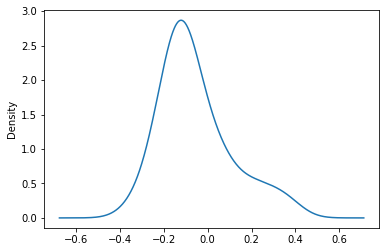

In [65]:
cd8_df["CD8_davoli"].plot(kind="kde")

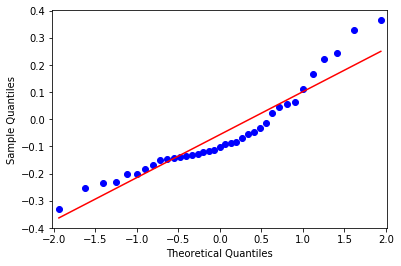

In [66]:
f = qqplot(cd8_df["CD8_davoli"].dropna(),line='s')

In [67]:
x = cd8_df["CD8_fractions"]

cd8_correlations = []
for cd8_estimate in cd8_df:
    
    if cd8_estimate != "CD8_fractions":
    
        y = cd8_df[cd8_estimate]
        #y = (cd8_df[cd8_estimate] - cd8_df[cd8_estimate].min()) / (cd8_df[cd8_estimate].max() - cd8_df[cd8_estimate].min())
    
        print(cd8_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("Not normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(kendalltau(x,y)[1])
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
                
        cd8_correlations.append([cd8_estimate,cor,p_val])
        

CD8_bindea

Not normal
HETEROscedastic

KENDALL
0.6008662216420089
CD8_davoli

Not normal
HETEROscedastic

KENDALL
0.007054732853301524
CD8_danaher

Not normal
HETEROscedastic

KENDALL
0.8752869537322376
CD8_mcp

Not normal
HETEROscedastic

KENDALL
0.4964399910945456
CD8_cib_abs

Not normal
HETEROscedastic

KENDALL
0.7047814994245565
CD8_xCELL

Not normal
HOMOscedastic

KENDALL
0.00416350752694546
CD8_TIMER

Not normal
HETEROscedastic

KENDALL
3.581733616584899e-05
CD8_Consensus

Not normal
HETEROscedastic

KENDALL
2.8375771941040163e-06


In [68]:
scipy.stats.kendalltau

<function scipy.stats.stats.kendalltau>

In [69]:
cd8_correlations

[['CD8_bindea', 0.060060060060060066, 0.6008662216420089],
 ['CD8_davoli', 0.30930930930930933, 0.007054732853301524],
 ['CD8_danaher', 0.018018018018018018, 0.8752869537322376],
 ['CD8_mcp', -0.07807807807807807, 0.4964399910945456],
 ['CD8_cib_abs', 0.04861089133580436, 0.7047814994245565],
 ['CD8_xCELL', 0.34196999003762196, 0.00416350752694546],
 ['CD8_TIMER', 0.4744744744744745, 3.581733616584899e-05],
 ['CD8_Consensus', 0.5375375375375375, 2.8375771941040163e-06]]

In [70]:
pvals = [corr[2] for corr in cd8_correlations]

pvals

[0.6008662216420089,
 0.007054732853301524,
 0.8752869537322376,
 0.4964399910945456,
 0.7047814994245565,
 0.00416350752694546,
 3.581733616584899e-05,
 2.8375771941040163e-06]

In [71]:
for i, corr in enumerate(cd8_correlations):
    
    pval = corr[2]
    
    if pval <= 0.0001:
        print(cd8_correlations[i][0], "****")
    elif pval <= 0.001:
        print(cd8_correlations[i][0], "***")
    elif pval <= 0.01:
        print(cd8_correlations[i][0], "**")
    elif pval <= 0.05:
        print(cd8_correlations[i][0], "*")
    elif pval <= 0.1:
        print(cd8_correlations[i][0], ".")
    else:
        print(cd8_correlations[i][0], "Not significant")

CD8_bindea Not significant
CD8_davoli **
CD8_danaher Not significant
CD8_mcp Not significant
CD8_cib_abs Not significant
CD8_xCELL **
CD8_TIMER ****
CD8_Consensus ****


### CD4 dataframe

In [72]:
cd4_dict = {
    'CD4_fractions':Tcell_fractions_df['CD4'],
    'CD4_bindea':bin_estimates['T_helper_cells'],
    'CD4_davoli':dav_estimates['CD4_mature'],
    'CD4_cib_abs':cib_abs_results.iloc[:,4:7].sum(axis='columns'),
    #'CD4_cib_rel':cib_rel_results.iloc[:,4:7].sum(axis='columns'),
    'CD4_xCELL':xcell_estimates.iloc[:,4:9].sum(axis='columns'),
    'CD4_TIMER':tim_estimates['T_cell.CD4'],
    'CD4_Consensus':con_estimates['T_cells_CD4'],
    #'ESTIMATE':1-estimate['TumorPurity'], # inverse relation with purity
    #'TITAN':1-titan['TumourCellularity_WES'] # inverse relation with purity
}

In [73]:
cd4_df = pd.DataFrame.from_dict(cd4_dict).dropna(axis='index')

In [74]:
cd4_df.head()

,CD4_fractions,CD4_bindea,CD4_davoli,CD4_cib_abs,CD4_xCELL,CD4_TIMER,CD4_Consensus
A01,0.048160,0.293718,0.031713,0.121892,0.3739,0.111783,-0.042384
A02,0.051004,0.316855,0.085348,0.124456,0.7126,0.119459,0.050694
A03,0.031771,0.314145,0.059252,0.216898,0.4770,0.116386,0.004308
A04,0.029632,0.306107,-0.184143,0.084977,0.3400,0.124712,-0.207399
A05,0.008272,0.304819,-0.083855,0.150804,0.2913,0.113799,-0.165377


In [75]:
x = cd4_df["CD4_fractions"]

cd4_correlations = []
for cd4_estimate in cd4_df:
    
    if cd4_estimate != "CD4_fractions":
    
        y = cd4_df[cd4_estimate]
        #y = (cd8_df[cd8_estimate] - cd8_df[cd8_estimate].min()) / (cd8_df[cd8_estimate].max() - cd8_df[cd8_estimate].min())
    
        print(cd4_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("Not normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(kendalltau(x,y)[1])
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
                
        cd4_correlations.append([cd4_estimate,cor,p_val])

CD4_bindea

Not normal
HOMOscedastic

KENDALL
0.4326102057526223
CD4_davoli

Not normal
HETEROscedastic

KENDALL
0.21891631225440467
CD4_cib_abs

Not normal
HETEROscedastic

KENDALL
0.3202253162144806
CD4_xCELL

Not normal
HETEROscedastic

KENDALL
0.29541770152393165
CD4_TIMER

Not normal
HETEROscedastic

KENDALL
0.7142093707713955
CD4_Consensus

Not normal
HETEROscedastic

KENDALL
0.046812802555416436


In [76]:
cd4_correlations

[['CD4_bindea', 0.0900900900900901, 0.4326102057526223],
 ['CD4_davoli', 0.14114114114114115, 0.21891631225440467],
 ['CD4_cib_abs', -0.11411411411411412, 0.3202253162144806],
 ['CD4_xCELL', 0.12012012012012013, 0.29541770152393165],
 ['CD4_TIMER', -0.04204204204204204, 0.7142093707713955],
 ['CD4_Consensus', 0.22822822822822825, 0.046812802555416436]]

In [77]:
pvals = [corr[2] for corr in cd4_correlations]

pvals

[0.4326102057526223,
 0.21891631225440467,
 0.3202253162144806,
 0.29541770152393165,
 0.7142093707713955,
 0.046812802555416436]

In [78]:
for i, pval in enumerate(pvals):
    if pval <= 0.0001:
        print(cd4_correlations[i][0], "****")
    elif pval <= 0.001:
        print(cd4_correlations[i][0], "***")
    elif pval <= 0.01:
        print(cd4_correlations[i][0], "**")
    elif pval <= 0.05:
        print(cd4_correlations[i][0], "*")
    elif pval <= 0.1:
        print(cd4_correlations[i][0], ".")
    else:
        print(cd4_correlations[i][0], "Not significant")

CD4_bindea Not significant
CD4_davoli Not significant
CD4_cib_abs Not significant
CD4_xCELL Not significant
CD4_TIMER Not significant
CD4_Consensus *


### Tregs dataframe

In [79]:
CD4FoxP3_dict = {
    'CD4FoxP3_fractions':Tcell_fractions_df['CD4FoxP3'],
    'CD4FoxP3_bindea':bin_estimates['Treg_cells'],
    'CD4FoxP3_davoli':dav_estimates['T_regs'],
    'CD4FoxP3_danaher':dan_estimates['Treg'],
    'CD4FoxP3_cib_abs':cib_abs_results['T cells regulatory (Tregs)'],
    #'CD4FoxP3_cib_rel':cib_rel_results['T cells regulatory (Tregs)'],
    'CD4FoxP3_xCELL':xcell_estimates['Tregs'],
    'CD4FoxP3_Consensus':con_estimates['T_regulatory_cells'],
    #'ESTIMATE':1-estimate['TumorPurity'], # inverse relation with purity
    #'TITAN':1-titan['TumourCellularity_WES'] # inverse relation with purity
}

In [80]:
cd4foxp3_df = pd.DataFrame.from_dict(CD4FoxP3_dict).dropna(axis='index')

In [81]:
cd4foxp3_df.head()

,CD4FoxP3_fractions,CD4FoxP3_bindea,CD4FoxP3_davoli,CD4FoxP3_danaher,CD4FoxP3_cib_abs,CD4FoxP3_xCELL,CD4FoxP3_Consensus
Mixture,,,,,,,
A01,0.002097,-0.281775,-0.408595,-0.246328,0.00000,0.0535,-0.108068
A02,0.003280,-0.285308,-0.250671,-0.249417,0.00000,0.1035,0.054963
A03,0.002473,-0.377414,-0.431835,-0.329935,0.00000,0.0452,-0.088210
A04,0.000922,-0.471797,-0.321068,-0.412445,0.00518,0.0958,-0.117862
A05,0.000008,-0.197050,-0.276252,-0.172261,0.00000,0.1198,-0.184319


In [82]:
x = cd4foxp3_df["CD4FoxP3_fractions"]

cd4foxp3_correlations = []
for cd4foxp3_estimate in cd4foxp3_df:
    
    if cd4foxp3_estimate != "CD4FoxP3_fractions":
    
        y = cd4foxp3_df[cd4foxp3_estimate]
        #y = (cd8_df[cd8_estimate] - cd8_df[cd8_estimate].min()) / (cd8_df[cd8_estimate].max() - cd8_df[cd8_estimate].min())
    
        print(cd4foxp3_estimate+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("Not normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(kendalltau(x,y)[1])
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
                
        cd4foxp3_correlations.append([cd4foxp3_estimate,cor,p_val])

CD4FoxP3_bindea

Not normal
HETEROscedastic

KENDALL
0.513147846751079
CD4FoxP3_davoli

Not normal
HETEROscedastic

KENDALL
0.9582772832988573
CD4FoxP3_danaher

Not normal
HETEROscedastic

KENDALL
0.513147846751079
CD4FoxP3_cib_abs

Not normal
HOMOscedastic

KENDALL
0.4789987995660788
CD4FoxP3_xCELL

Not normal
HETEROscedastic

KENDALL
0.6840142529684263
CD4FoxP3_Consensus

Not normal
HETEROscedastic

KENDALL
0.026188179371314374


In [83]:
cd4foxp3_correlations.sort(key=lambda x: x[1])

In [84]:
cd4foxp3_correlations

[['CD4FoxP3_cib_abs', -0.0951017268828656, 0.4789987995660788],
 ['CD4FoxP3_davoli', -0.006006006006006007, 0.9582772832988573],
 ['CD4FoxP3_xCELL', 0.04729821182425404, 0.6840142529684263],
 ['CD4FoxP3_bindea', 0.07507507507507508, 0.513147846751079],
 ['CD4FoxP3_danaher', 0.07507507507507508, 0.513147846751079],
 ['CD4FoxP3_Consensus', 0.2552552552552552, 0.026188179371314374]]

In [85]:
pvals = [corr[2] for corr in cd4foxp3_correlations]

pvals

[0.4789987995660788,
 0.9582772832988573,
 0.6840142529684263,
 0.513147846751079,
 0.513147846751079,
 0.026188179371314374]

In [86]:
for i, pval in enumerate(pvals):
    if pval <= 0.0001:
        print(cd4foxp3_correlations[i][0], "****")
    elif pval <= 0.001:
        print(cd4foxp3_correlations[i][0], "***")
    elif pval <= 0.01:
        print(cd4foxp3_correlations[i][0], "**")
    elif pval <= 0.05:
        print(cd4foxp3_correlations[i][0], "*")
    elif pval <= 0.1:
        print(cd4foxp3_correlations[i][0], ".")
    else:
        print(cd4foxp3_correlations[i][0], "Not significant")

CD4FoxP3_cib_abs Not significant
CD4FoxP3_davoli Not significant
CD4FoxP3_xCELL Not significant
CD4FoxP3_bindea Not significant
CD4FoxP3_danaher Not significant
CD4FoxP3_Consensus *


## Plot barplot correlations

### Define method colour

In [87]:
method_colours = dict({
    'cib':      '#6FCCDD',
    'mcp':      '#B9529F',
    'danaher':  '#0E8040',
    'xCELL':    '#F7931D',
    'bindea':   '#F6EB16',
    'davoli':   '#231F20',
    'Consensus':'#3953A4',
    'TIMER':    '#FF0000',
    'ESTIMATE': 'grey',
    'TITAN':    'k'
})

### CD8

In [88]:
cd8_correlations_dict = {m[0]: {'tau': m[1]} for m in cd8_correlations}

In [89]:
cd8_correlations_df = pd.DataFrame.from_dict(cd8_correlations_dict)

cd8_correlations_df.sort_values(by=['tau'],
                                axis='columns',
                                inplace=True)

In [91]:
cd8_correlations_df.head()

,CD8_mcp,CD8_danaher,CD8_cib_abs,CD8_bindea,CD8_davoli,CD8_xCELL,CD8_TIMER,CD8_Consensus
tau,-0.078078,0.018018,0.048611,0.06006,0.309309,0.34197,0.474474,0.537538


In [92]:
bar_colors = []

for col in cd8_correlations_df:
    
    if '_' in col: 
        
        bar_colors.append(method_colours[col.split('_')[1]])
        
    else:
        
        bar_colors.append(method_colours[col])
    
bar_colors

['#B9529F',
 '#0E8040',
 '#6FCCDD',
 '#F6EB16',
 '#231F20',
 '#F7931D',
 '#FF0000',
 '#3953A4']

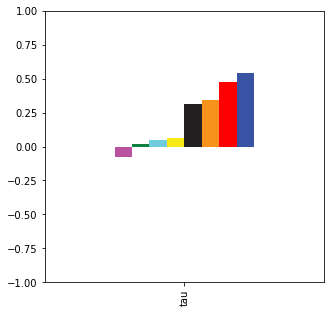

In [93]:
ax = cd8_correlations_df.plot(kind='bar',
                              color=bar_colors,
                              figsize=(5,5),
                              ylim=(-1,1),
                              legend=False)

In [94]:
fig = ax.get_figure()

In [96]:
ls ../../Figures/main/3/panels/

3a_TxNaive_WES_TME_vs_RNA_TME_tau.pdf


In [97]:
FILE = "../../Figures/main/3/panels/3a_TxNaive_CD8_IF_vs_RNA_CD8_tau.pdf"

fig.savefig(FILE, bbox_tight=True)

### CD4

In [98]:
cd4_correlations_dict = {m[0]: {'tau': m[1]} for m in cd4_correlations}

In [99]:
cd4_correlations_df = pd.DataFrame.from_dict(cd4_correlations_dict)

cd4_correlations_df.sort_values(by=['tau'],
                                axis='columns',
                                inplace=True)

In [103]:
cd4_correlations_df.head()

,CD4_cib_abs,CD4_TIMER,CD4_bindea,CD4_xCELL,CD4_davoli,CD4_Consensus
tau,-0.114114,-0.042042,0.09009,0.12012,0.141141,0.228228


In [101]:
bar_colors = []

for col in cd4_correlations_df:
    
    if '_' in col: 
        
        bar_colors.append(method_colours[col.split('_')[1]])
        
    else:
        
        bar_colors.append(method_colours[col])
    
bar_colors

['#6FCCDD', '#FF0000', '#F6EB16', '#F7931D', '#231F20', '#3953A4']

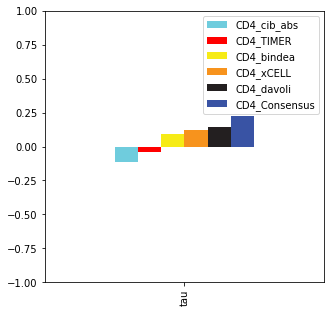

In [102]:
ax = cd4_correlations_df.plot(kind='bar',
                              color=bar_colors,
                              figsize=(5,5),
                              ylim=(-1,1))

In [104]:
fig = ax.get_figure()

In [105]:
FILE = "../../Figures/main/3/panels/3a_TxNaive_CD4_IF_vs_CD4_TME_tau.pdf"

fig.savefig(FILE, bbox_tight=True)

### CD4FoxP3

In [106]:
cd4foxp3_correlations_dict = {m[0]: {'tau': m[1]} for m in cd4foxp3_correlations}

In [107]:
cd4foxp3_correlations_df = pd.DataFrame.from_dict(cd4foxp3_correlations_dict)

cd4foxp3_correlations_df.sort_values(by=['tau'],
                                     axis='columns',
                                     inplace=True)

In [108]:
cd4foxp3_correlations_df

,CD4FoxP3_cib_abs,CD4FoxP3_davoli,CD4FoxP3_xCELL,CD4FoxP3_bindea,CD4FoxP3_danaher,CD4FoxP3_Consensus
tau,-0.095102,-0.006006,0.047298,0.075075,0.075075,0.255255


In [110]:
bar_colors = []

for col in cd4foxp3_correlations_df:
    
    if '_' in col: 
        
        bar_colors.append(method_colours[col.split('_')[1]])
        
    else:
        
        bar_colors.append(method_colours[col])
    
bar_colors

['#6FCCDD', '#231F20', '#F7931D', '#F6EB16', '#0E8040', '#3953A4']

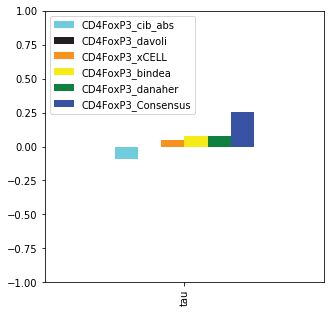

In [111]:
ax = cd4foxp3_correlations_df.plot(kind='bar',
                                   color=bar_colors,
                                   figsize=(5,5),
                                   ylim=(-1,1))

In [112]:
fig = ax.get_figure()

In [113]:
FILE = "../../Figures/main/3/panels/3a_TxNaive_CD4FoxP3_IF_vs_RNA_CD4FoxP3_tau.pdf"

fig.savefig(FILE, bbox_tight=True)

# End script